In [1]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
df = pd.read_csv('ex1data1.txt', names=['population', 'profit'])#读取数据并赋予列名

In [3]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.info

<bound method DataFrame.info of     population    profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
5       8.3829  11.88600
6       7.4764   4.34830
7       8.5781  12.00000
8       6.4862   6.59870
9       5.0546   3.81660
10      5.7107   3.25220
11     14.1640  15.50500
12      5.7340   3.15510
13      8.4084   7.22580
14      5.6407   0.71618
15      5.3794   3.51290
16      6.3654   5.30480
17      5.1301   0.56077
18      6.4296   3.65180
19      7.0708   5.38930
20      6.1891   3.13860
21     20.2700  21.76700
22      5.4901   4.26300
23      6.3261   5.18750
24      5.5649   3.08250
25     18.9450  22.63800
26     12.8280  13.50100
27     10.9570   7.04670
28     13.1760  14.69200
29     22.2030  24.14700
..         ...       ...
67     10.2360   7.77540
68      5.4994   1.01730
69     20.3410  20.99200
70     10.1360   6.67990
71      7.3345   4.02590
72      6.0062   1.27840
73      7.2259   3

D:\Download\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


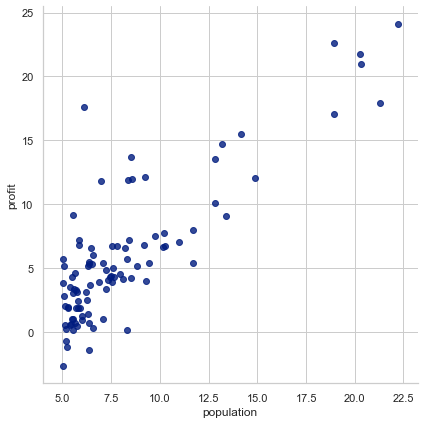

In [5]:
sns.lmplot('population', 'profit', df, size=6, fit_reg=False)
plt.show()

In [6]:
ones = pd.DataFrame({'ones': np.ones(len(df))})
ones

,ones
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [7]:
def get_X(df): 
    ones = pd.DataFrame({'ones': np.ones(len(df))})#ones是m行1列的dataframe
    data = pd.concat([ones, df], axis=1)  # 合并数据，根据列合并
    return data.iloc[:, :-1].as_matrix()  # 这个操作返回 ndarray,不是矩阵

def get_Y(df):
    return np.array(df.iloc[:,-1])

def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())
    

In [9]:
d = pd.concat([ones, df], axis=1)
d

,ones,population,profit
0,1.0,6.1101,17.59200
1,1.0,5.5277,9.13020
2,1.0,8.5186,13.66200
3,1.0,7.0032,11.85400
4,1.0,5.8598,6.82330
5,1.0,8.3829,11.88600
6,1.0,7.4764,4.34830
7,1.0,8.5781,12.00000
8,1.0,6.4862,6.59870
9,1.0,5.0546,3.81660


In [10]:
d.iloc[:, :-1].as_matrix()

D:\Download\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

In [15]:
df_test = pd.DataFrame({'a':[2,8,6,5,10],'b':[5,8,9,6,3],'c':[4,6,3,9,1]})
df_test

,a,b,c
0,2,5,4
1,8,8,6
2,6,9,3
3,5,6,9
4,10,3,1


In [18]:
df_test.iloc[:-1,:-1]

,a,b
0,2,5
1,8,8
2,6,9
3,5,6


In [20]:
np_test = np.array([1,2,3])
np_test

array([1, 2, 3])

In [21]:
np_test = np.zeros(2)
np_test


array([0., 0.])